<a href="https://colab.research.google.com/github/yashverma27/ml_projects/blob/master/Regression%20app_or_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**
 There is a  Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

# **OBJECTIVE**
Use different techniques to decide whether company to focus their efforts on their mobile app experience or their website.



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#reading data
data=pd.read_csv("Ecommerce Customers.csv")

In [ ]:
#getting different columns
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
#getting top 5 rows of dataset
data.head()

Email  ... Yearly Amount Spent
0      mstephenson@fernandez.com  ...          587.951054
1              hduke@hotmail.com  ...          392.204933
2               pallen@yahoo.com  ...          487.547505
3        riverarebecca@gmail.com  ...          581.852344
4  mstephens@davidson-herman.com  ...          599.406092

[5 rows x 8 columns]

In [ ]:
#checks if data has null value and sum up all null value
data.isnull().sum() 


Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## **Observation**

1)No null value found.

In [ ]:

data.describe()

Avg. Session Length  ...  Yearly Amount Spent
count           500.000000  ...           500.000000
mean             33.053194  ...           499.314038
std               0.992563  ...            79.314782
min              29.532429  ...           256.670582
25%              32.341822  ...           445.038277
50%              33.082008  ...           498.887875
75%              33.711985  ...           549.313828
max              36.139662  ...           765.518462

[8 rows x 5 columns]

# Observation

1)Mean and median(50th percentile) are almost same which leads to gausian distribution.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


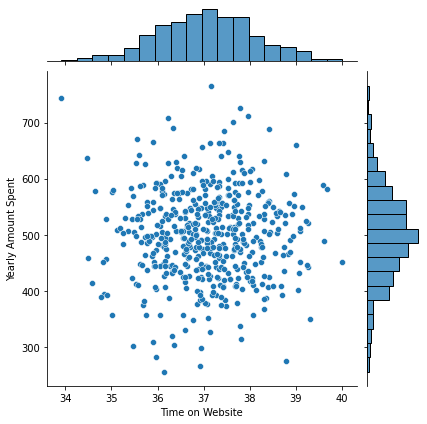

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)

# **Observation**
1)No corelation between Time on website and yearly amount spent.

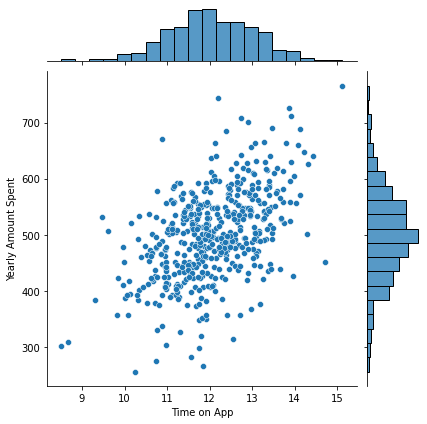

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data)

# **Observation**
1)positive corelation between Time on app and Yearly Amount Spent.

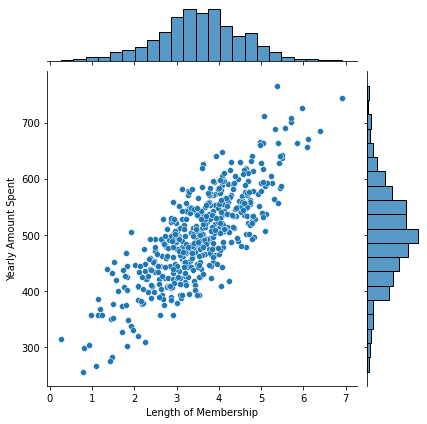

In [ ]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

# **Observation**
1)Positive linear relationship between Length of Membership and Yearly Amount Spent.

2)Larger positive corelation than Time on app and Yearly amount spent.

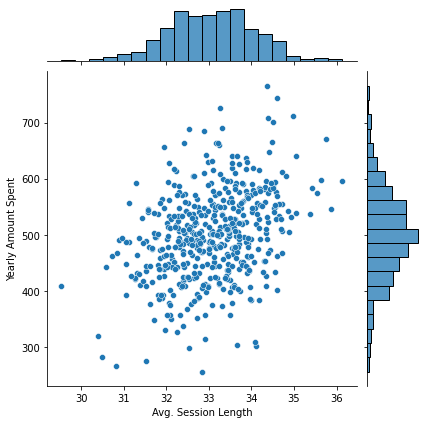

In [ ]:
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=data)

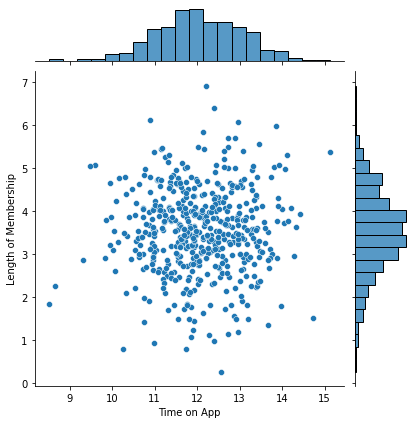

In [ ]:
sns.jointplot(x='Time on App',y='Length of Membership',data=data)

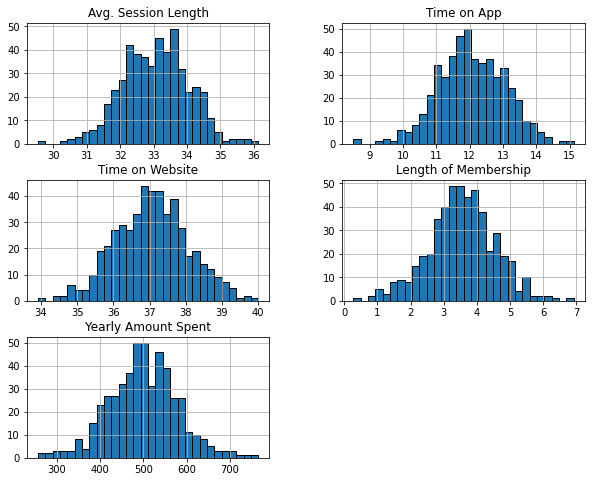

In [ ]:
data.hist(bins=30, edgecolor='black', figsize=(10,8))
plt.show()

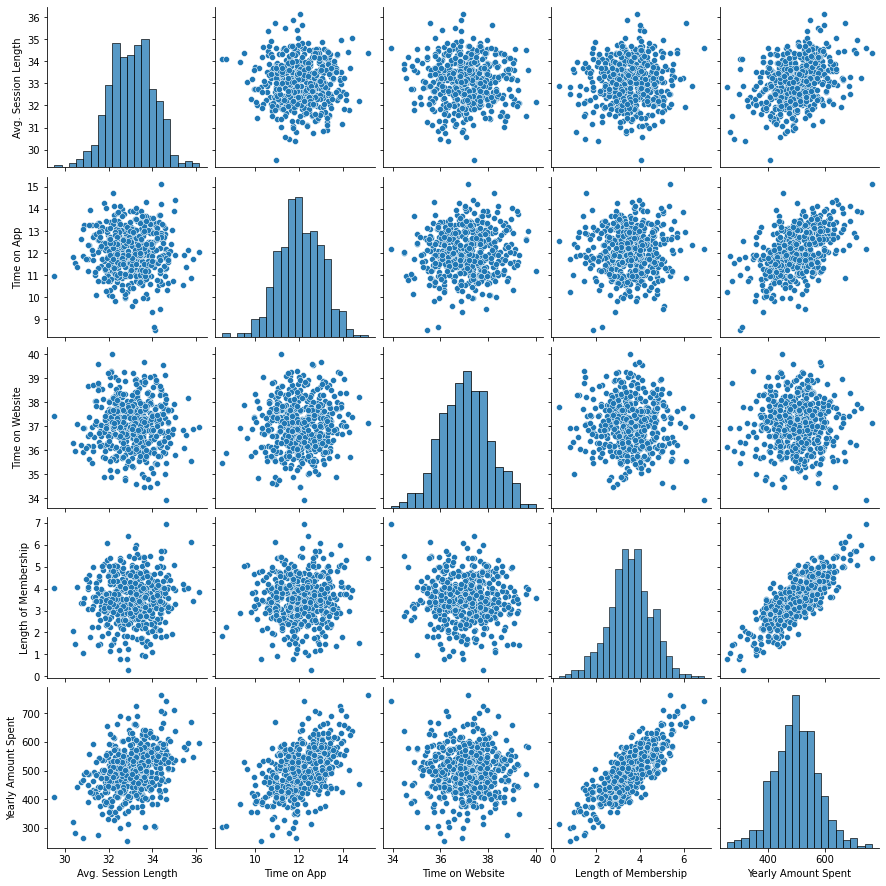

In [ ]:
sns.pairplot(data)

# **Observation**
Most correlated feature is Length of membership

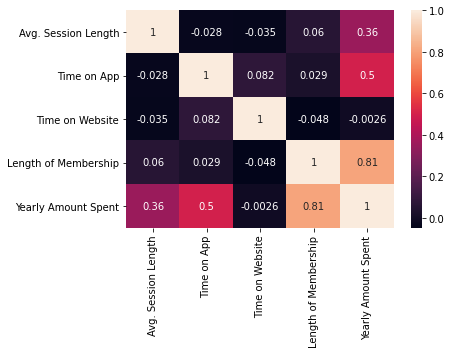

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

# **Observation**
1) Largest correlation(0.81) between Yearly amount spent and Length of Membership.

2) Smallest correlation(-0.0026) between Time on website and Yearly amount spent.

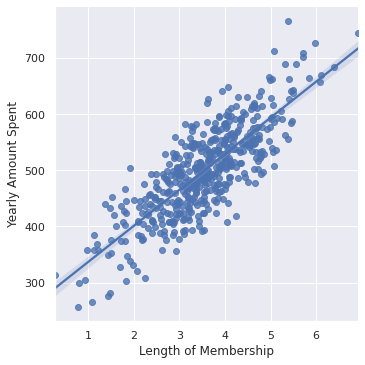

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=data)

In [ ]:
#independent variable
X = data.iloc[:,[3,4,5,6]]


In [ ]:
#dependent variable
y=data.iloc[:,7]

In [ ]:
#importing traintest split
from sklearn.model_selection import train_test_split

In [ ]:
#dividing data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
#importing linear regression  
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#getting cofficients 
lr.coef_

array([26.06944865, 38.67556383,  0.2518291 , 61.31057149])

Text(0.5, 0, 'Y test')

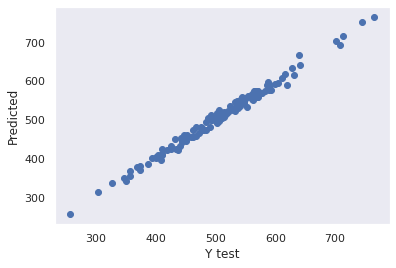

In [ ]:
pred=lr.predict(X_test)
plt.scatter(y_test, pred)
plt.ylabel('Predicted')
plt.grid()
plt.xlabel('Y test')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


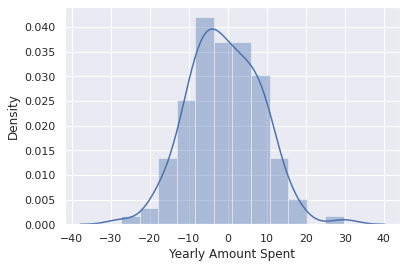

In [ ]:
sns.distplot((y_test-pred))

# **Observation**
1) close to Normal distribution curve.

In [ ]:
##using different  performance metrics 
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))


MAE: 7.419686968689776
MSE: 83.4741822628854
RMSE: 9.136420648311098


In [ ]:
pd.DataFrame(lr.coef_ , X.columns, columns=['Coeffecient of features'])

Coeffecient of features
Avg. Session Length                 26.069449
Time on App                         38.675564
Time on Website                      0.251829
Length of Membership                61.310571

# **CONCLUSION**
1)The greater the value the more related it is to the target.

2)The company should focus on the mobile app

